In [121]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [148]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [144]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy

In [123]:
df=pd.read_csv('../data/Season_2017.csv')

In [124]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [125]:
df2=pd.read_csv('../data/Playoffs_2017.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [126]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [127]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted','H_median_odds','A_median_odds','fav_win','home_fav'],axis=1)

In [128]:
df.home_win.value_counts(normalize=True)

1    0.539506
0    0.460494
Name: home_win, dtype: float64

In [129]:
df2.home_win.value_counts(normalize=True)

1    0.722222
0    0.277778
Name: home_win, dtype: float64

In [130]:
df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYY,34.210526,4.052632,7.000000,3.789474,3.380526,3.526316,11.736842,38.315789,0.200579,...,8.000000,20.000000,7.000000,0.0,30.000000,7.000000,1.000000,0.043000,0.900000,1
1,ARI,34.714286,6.142857,9.571429,5.857143,6.251429,3.142857,9.571429,38.285714,0.263000,...,13.000000,17.000000,10.000000,0.0,33.000000,2.000000,1.000000,0.037000,-3.000000,1
3,CLE,33.636364,4.363636,6.000000,4.090909,3.477273,4.000000,12.090909,39.000000,0.175818,...,10.684211,12.210526,5.368421,0.0,53.263158,2.777778,0.388889,0.144684,1.015789,1
4,HOU,33.750000,4.700000,8.450000,4.400000,4.706000,3.400000,7.100000,37.700000,0.241200,...,8.166667,20.833333,10.333333,0.0,52.333333,2.000000,1.000000,0.103000,0.900000,1
8,WSN,32.250000,4.250000,6.500000,3.875000,4.187500,5.000000,8.250000,38.125000,0.190500,...,11.533333,13.000000,4.933333,0.0,60.666667,1.133333,0.266667,0.119667,1.786667,0
9,LAD,32.842105,5.684211,8.263158,5.263158,5.519474,4.578947,8.736842,38.631579,0.244474,...,13.142857,15.000000,8.000000,0.0,45.428571,2.428571,0.857143,0.008429,-1.571429,1
18,WSN,32.250000,4.250000,6.500000,3.875000,4.187500,5.000000,8.250000,38.125000,0.190500,...,11.533333,13.000000,4.933333,0.0,60.666667,1.133333,0.266667,0.119667,1.786667,1
21,BOS,33.833333,3.666667,9.000000,3.666667,3.875000,2.833333,8.333333,37.000000,0.263333,...,10.200000,13.400000,6.300000,0.0,46.650000,2.450000,0.800000,-0.106200,-0.280000,1
22,NYY,34.210526,4.052632,7.000000,3.789474,3.380526,3.526316,11.736842,38.315789,0.200579,...,11.727273,11.363636,5.181818,0.0,52.727273,1.909091,0.545455,0.156545,0.836364,1
23,CHC,30.733333,2.866667,5.200000,2.600000,2.375333,2.400000,10.400000,34.333333,0.166267,...,10.125000,11.125000,5.125000,0.0,59.000000,2.500000,1.250000,0.096125,0.425000,1


In [131]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1,ARI,34.104938,5.012346,8.672840,4.790123,4.939444,3.567901,8.987654,38.419753,0.249259,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
2,STL,33.765432,4.697531,8.654321,4.493827,4.486728,3.660494,8.320988,38.388889,0.252457,...,11.839506,13.160494,6.592593,0.006173,49.012346,1.453416,0.472050,-0.011130,-0.415432,1
3,TEX,33.518519,4.932099,8.185185,4.666667,4.781358,3.358025,9.216049,37.790123,0.240247,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,0
4,MIL,33.691358,4.444444,8.351852,4.216049,4.273951,3.271605,9.697531,37.703704,0.243426,...,13.265432,13.413580,6.629630,0.018519,46.876543,1.465839,0.472050,0.015272,-0.198765,0


In [132]:
#for col in X_train.columns:
    #print(col)

In [133]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [134]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [135]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [136]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [137]:
X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [138]:
X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [139]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [140]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

In [141]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [142]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [143]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5818930041152263
Train Mean Accuracy: 0.5835390946502058
Test Mean Accuracy: 0.6086956521739131
Recall Score: 0.5333333333333333
Precision Score: 0.8
F1 Score: 0.64


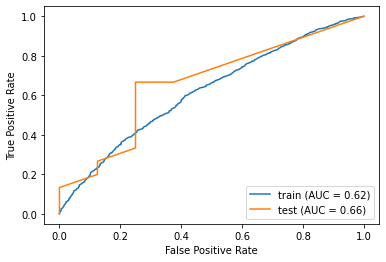

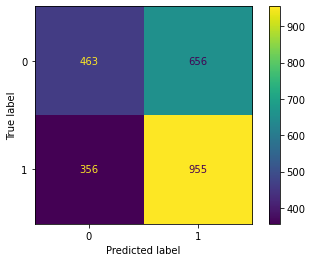

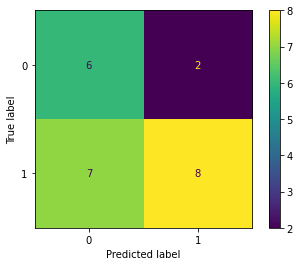

In [153]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [154]:
new_acc(probabilities)

0.6363636363636364

### Home_win, zero imp
***

In [23]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [24]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5802469135802469
Train Mean Accuracy: 0.5876543209876544
Test Mean Accuracy: 0.6086956521739131
Recall Score: 0.5333333333333333
Precision Score: 0.8
F1 Score: 0.64


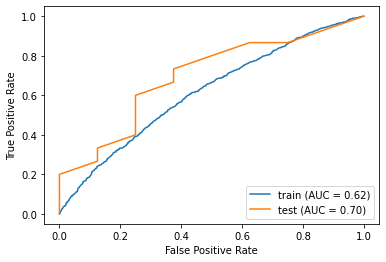

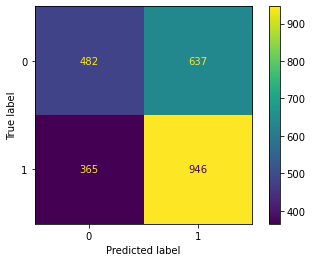

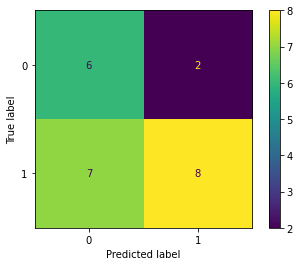

In [25]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### Explore thresehold movement and other things

In [59]:
class_list2=[]
for log in probabilities:
    if log[0]<.40:
        class_list2.append(1)
    elif log[0]>.60:
        class_list2.append(0)
    else:
        class_list2.append(3)

In [60]:
np.array(class_list2)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0,
       0])

In [61]:
np.array(y_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0])

In [32]:
logregs.predict(X_test_scaled)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [62]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [66]:
y_pred=logregs.predict(X_test_scaled)

In [43]:
class_list=[]
for log in logregs.predict_proba(X_test_scaled):
    if log[0]<.40:
        class_list.append(1)
    elif log[0]>.60:
        class_list.append(0)
    else:
        class_list.append(3)

In [72]:
y_test_df=pd.DataFrame(y_test)

In [79]:
y_test_df.reset_index(inplace=True)
y_test_df.drop('index',axis=1,inplace=True)

In [74]:
y_pred_class=pd.DataFrame(class_list)

In [84]:
combination=pd.concat([y_test_df,y_pred_class],axis=1)

In [86]:
combination['pred']=combination[0]

In [88]:
combination.drop(0,axis=1,inplace=True)

In [91]:
combination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   home_win  23 non-null     int64
 1   pred      23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [93]:
combination['bet']=np.where(combination['pred']==3,'no','yes')

In [98]:
combination

,home_win,pred,bet
0,1,1,yes
1,1,1,yes
2,1,1,yes
3,1,1,yes
4,0,3,no
5,1,1,yes
6,1,3,no
7,1,0,yes
8,1,3,no
9,1,0,yes


In [101]:
combination.drop(combination[combination['pred'] == 3].index, inplace = True)

In [104]:
combination.reset_index(inplace=True)

In [109]:
combination.drop('bet',axis=1,inplace=True)

In [119]:
count=0
for bools in combination['home_win']==combination['pred']:
    if bools is True:
        count+=1
    else:
        pass


In [117]:
combination['home_win']==combination['pred']

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15    False
16    False
17     True
18    False
19     True
dtype: bool

In [120]:
count

13

In [116]:
combination

,home_win,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


In [41]:
clas=[]
for log in logregs.predict_proba(X_test_scaled):
    clas.append(log[0])

In [42]:
clas

[0.05700160930305964,
 0.1024097633297757,
 0.2141985823946485,
 0.2138068415045462,
 0.5000051725684485,
 0.08290861729812149,
 0.5000051725684485,
 0.9608261621586727,
 0.48795141750693216,
 0.8417906330384799,
 0.898093651952056,
 0.9608261621586727,
 0.2141985823946485,
 0.8417906330384799,
 0.17206246657840396,
 0.3360459125066567,
 0.6212552931515466,
 0.9695223824955316,
 0.9695223824955316,
 0.6166601479069842,
 0.6166601479069842,
 0.789995523377905,
 0.789995523377905]

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Model

In [150]:
def knn(X_train, X_test, y_train, y_test, metric='minkowski', cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_neighbors': [5,7,9,11,13,15,17],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}
    
    # Instantiate & fit KNN model for GridSearch
    grid_knn = KNeighborsClassifier()
    grid_knn.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    knn_params = gs.best_params_
    
    # Use best # of neighbors from best_params
    knn_neighbors = knn_params['n_neighbors']
    print(f'Number of Neighbors: {knn_neighbors}')
    
    # Use best metric from best_params
    knn_metric = knn_params['metric']
    print(f'Metric: {knn_metric}')
    
    # Use best weights from best_params
    knn_weights=knn_params['weights']
    print(f'Weights: {knn_weights}')
    
    # Instantiate & fit K-Nearest Neighbors model
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, metric=knn_metric,
                               weights=knn_weights)
    knn.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = knn.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = knn.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(knn, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(knn, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(knn, X_train, y_train)
    plot_confusion_matrix(knn, X_test, y_test)
    
    return y_pred,y_proba
    

### Home win KNN

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.548148148148148
Train Mean Accuracy: 0.6226337448559671
Test Mean Accuracy: 0.6521739130434783
Recall Score: 0.7333333333333333
Precision Score: 0.7333333333333333
F1 score: 0.7333333333333333


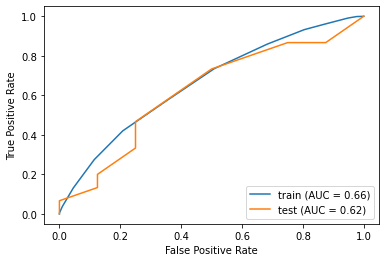

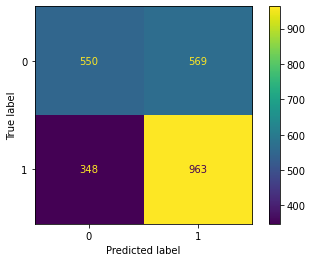

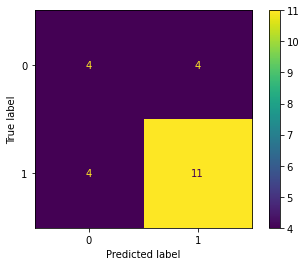

In [151]:
predictions,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [152]:
new_acc(probabilities)

0.6363636363636364

# Decision Tree

In [156]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

In [155]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=42)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    y_prob= dtree.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)
    
    return y_pred,y_prob
    

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5691358024691358
Train Mean Accuracy: 0.5818930041152264
Test Mean Accuracy: 0.5652173913043478
Recall Score: 0.4666666666666667
Precision Score: 0.7777777777777778
F1 score: 0.5833333333333334


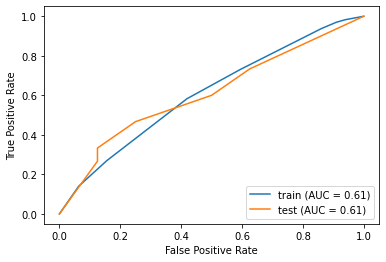

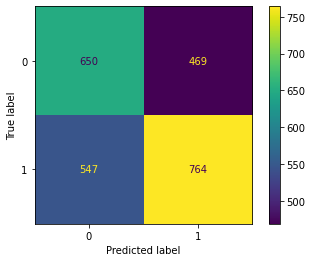

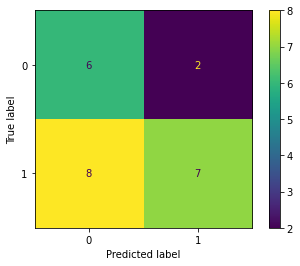

In [157]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [158]:
new_acc(probabilities)

0.6153846153846154

# Random Forest

In [159]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

In [160]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


Number of Trees: 500
criterion: entropy
Mean Cross-Val Score: 0.5440329218106995
Train Mean Accuracy: 0.6921810699588478
Test Mean Accuracy: 0.6086956521739131
Recall Score: 0.6
Precision Score: 0.75
F1 score: 0.6666666666666665


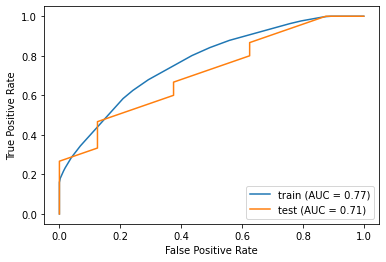

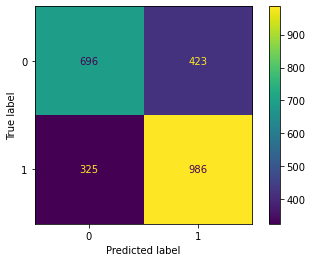

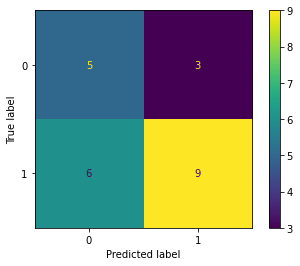

In [161]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [162]:
new_acc(probabilities)

0.8571428571428571

### RForest Home Win

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.5366255144032922
Train Mean Accuracy: 0.6921810699588478
Test Mean Accuracy: 0.7037037037037037
Recall Score: 0.8205128205128205
Precision Score: 0.7804878048780488
F1 score: 0.8


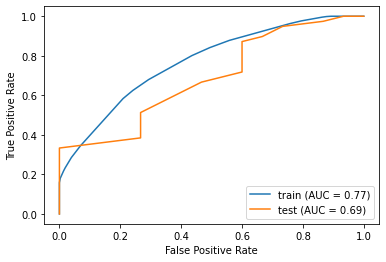

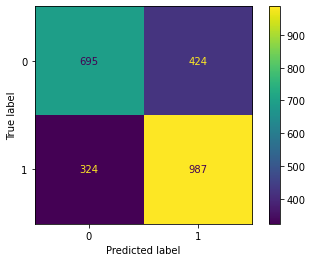

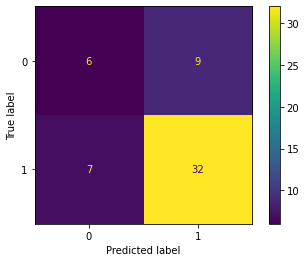

In [53]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

# Bagging Classifier

In [185]:
#bagged(X_train_best_tree,X_test_best_tree,y_train,y_test)

# XGBoost

In [88]:
xfeats= feature_select(X_train_scaled,y_train,XGBClassifier,min_features=10)
X_train_best_x = X_train_scaled[xfeats]
X_test_best_x = X_test_scaled[xfeats]

In [186]:
#xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)